In [2]:
import os 
import pandas as pd 
import tensorflow as tf 
import time 

from sklearn.model_selection import train_test_split
from sklearn  import feature_selection
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


from sklearn.ensemble import RandomForestClassifier

In [20]:
address = "E:\\DKE related\\Studies\\Second Semester\\ATiML\\Codes\\Semester Project\\Gutenberg_English_Fiction_1k\\master996.csv"

df = pd.read_csv(address)
df[df['name'] == 'pg8899.epub']
# df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x97 in position 13: invalid start byte

In [85]:
address = "E:\\DKE related\\Studies\\Second Semester\\ATiML\\Codes\\Semester Project\\feature.csv"

df = pd.read_csv(address)
df[df['name'] == 'pg8899.epub']
# df

,name,hyphens,colons,semi_colon,interjections,Preposition_or_subordinating_conjunction,personal_pronoun,possessive_pronoun,male_oriented,female_oriented,comma,period,co_conjunction,fres
134,pg8899.epub,0.020146,0.00076,0.001837,0.003247,0.102331,0.07737,0.033118,0.37715,0.213016,0.056717,0.041037,0.045504,97.375725


In [86]:
address = "E:\\DKE related\\Studies\\Second Semester\\ATiML\\Codes\\Semester Project\\feature_vector.csv"

df = pd.read_csv(address)
df[df['book_id'] == 'pg8899.epub']

,book_id,avg_sentence_length,avg_char_per_word,avg_punctuation_per_sentence,long_word_ratio,noun_ratio,verb_ratio,adverb_ratio,preposition_ratio,adjective_ratio,article_ratio,gerund_infinitive_ratio,downtoner_ratio,amplifier_ratio,demonstrative_ratio,type_token_ratio,genre
114,pg8899.epub,0.073,4.1573,2.7256,0.1395,0.2141,0.1846,0.0672,0.1127,0.0705,0.0635,0.0151,0.0039,0.0018,0.0119,0.0071,Romance


In [3]:
columns_from_java_output = ['name', 'hyphens', 'colons', 'semi_colon', 'interjections', 'male_oriented', 'female_oriented', 'comma', 'period', 'fres'] 

name_of_python_output = "style_feature.csv"
name_of_java_output = "other_features.csv"

path_to_python_out = os.path.join(os.getcwd(), name_of_python_output)
path_to_java_out = os.path.join(os.getcwd(), name_of_java_output)

python_out = pd.read_csv(path_to_python_out)
java_out = pd.read_csv(path_to_java_out)

# python_out.drop(['avg_punctuation_per_sentence'], axis=1, inplace=True)
java_out = java_out[columns_from_java_output]

df = python_out.merge(java_out, left_on='book_id', right_on='name')
df.drop(['name'], axis=1, inplace=True)

cols = list(df.columns.values)
cols.pop(cols.index('genre'))
df = df[cols+['genre']]

df.drop(df.loc[df['genre'] == 'Allegories'].index, inplace=True)

df['genre'] = df['genre'].astype('category')
df['genre'] = df['genre'].cat.codes
df


,book_id,avg_sentence_length,avg_char_per_word,avg_punctuation_per_sentence,long_word_ratio,noun_ratio,verb_ratio,adverb_ratio,preposition_ratio,adjective_ratio,...,hyphens,colons,semi_colon,interjections,male_oriented,female_oriented,comma,period,fres,genre
0,pg44018.epub,0.0436,4.3955,5.4425,0.1811,0.2354,0.1877,0.0591,0.1322,0.0746,...,0.007732,0.002541,0.010647,0.002136,0.377383,0.171201,0.102709,0.022088,78.201643,4
1,pg35509.epub,0.0621,4.3673,3.5867,0.1794,0.2425,0.1732,0.0597,0.1339,0.0805,...,0.010637,0.001506,0.003221,0.002225,0.304162,0.157432,0.070962,0.041321,89.787437,4
2,pg41564.epub,0.0437,4.2362,5.1578,0.1600,0.1981,0.2051,0.0792,0.1114,0.0717,...,0.008501,0.000158,0.007467,0.003805,0.152394,0.248537,0.090008,0.028045,79.812453,4
3,pg30075.epub,0.0796,4.2663,3.1444,0.1719,0.2304,0.2084,0.0589,0.1071,0.0564,...,0.003552,0.000669,0.000600,0.003482,0.162269,0.127951,0.055051,0.049746,93.230489,4
4,pg30436.epub,0.0684,4.3043,3.0671,0.1614,0.2400,0.1855,0.0619,0.1116,0.0810,...,0.011565,0.002002,0.006475,0.001434,0.267147,0.182013,0.064562,0.043974,89.614016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,pg19337DickensChristCarl.epub,0.0694,4.2876,3.5462,0.1669,0.2390,0.1855,0.0544,0.1252,0.0718,...,0.008554,0.001618,0.009651,0.003290,0.338531,0.036882,0.076879,0.038028,95.977566,1
135,pg1392.epub,0.0488,4.3154,4.1077,0.1814,0.2412,0.1759,0.0554,0.1294,0.0681,...,0.011659,0.000496,0.008930,0.001240,0.321330,0.066482,0.080205,0.030346,83.475617,1
136,pg43190.epub,0.0641,4.1603,3.9959,0.1451,0.2326,0.1909,0.0500,0.1227,0.0637,...,0.008864,0.000752,0.008586,0.003543,0.210297,0.163412,0.064827,0.038061,95.011601,1
137,pg587.epub,0.0646,3.8899,3.1216,0.0985,0.2135,0.2097,0.0508,0.1032,0.0581,...,0.007602,0.001968,0.000725,0.003104,0.246856,0.098621,0.053216,0.045160,100.073559,3


In [4]:
X = df.iloc[:, 1:-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0, shuffle=True, stratify = Y)

In [5]:
X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape

((102, 24), (35, 24), (102,), (35,))

In [19]:
import numpy as np 
np.unique(Y_test).shape[0]

8

In [18]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=50, C=500))
])

svm_clf.fit(X_train_val, Y_train_val)
Y_pred_svm = svm_clf.predict(X_test)

precision_recall_fscore_support(Y_test, Y_pred_svm, average='macro')

(0.2659722222222222, 0.28125, 0.27162114845938373, None)

In [14]:
import numpy as np 
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])
precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.2222222222222222, 0.3333333333333333, 0.26666666666666666, None)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

gsc = GridSearchCV(
        estimator=SVC(kernel='rbf'),
        param_grid={
            'C': [0.01, 0.1, 1, 10, 100, 1000],
            'degree': [1, 2, 3, 4, 5, 6, 7],
            'coef0': [ 0.05, 0.1, 0.5, 1, 5]
        },
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_train_val, Y_train_val)
best_params = grid_result.best_params_

best_params

{'C': 1000, 'coef0': 0.05, 'degree': 1}

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

def calculate(method, param, X, Y):
    gsc = GridSearchCV(
            estimator=method,
            param_grid=param,
            cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X, Y)
    best_params = grid_result.best_params_

    return best_params

In [65]:
param_dict = { 'alpha': [1000, 100, 10, 5, 1, 0.5, 0.1, 0, 0.05, 0.01, 0.001]}
method = MultinomialNB()

calculate(method, param_dict)

{'alpha': 0.1}

In [8]:
from sklearn.svm import SVC
method=SVC(kernel='poly')
param_dict={
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'degree': [1, 2, 3, 4, 5, 6, 7],
    'coef0': [ 0.05, 0.1, 0.5, 1, 5],
    'tol': [0.001, 0.005, 0.01, 0.05]
}
%time calculate(method, param_dict, X_train_val, Y_train_val)

In [74]:
from sklearn.linear_model import LogisticRegression
method=LogisticRegression()
param_dict={
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],
    'tol': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],
    'intercept_scaling': [0.005, 0.01, 0.05, 0.1],
    'multi_class': ['multinomial'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'class_weight': ['balanced'], 
    'max_iter': [10000]
}
calculate(method, param_dict)

{'C': 0.001,
 'class_weight': 'balanced',
 'intercept_scaling': 0.1,
 'max_iter': 10000,
 'multi_class': 'multinomial',
 'penalty': 'l1',
 'solver': 'saga',
 'tol': 0.05}

In [17]:
from sklearn.ensemble import RandomForestClassifier

method=RandomForestClassifier()
param_dict={
    'criterion': ['gini', 'entropy'], 
    'max_depth': [10, 20, 50, 100],
    'max_leaf_nodes': [10, 20, 50, 100],
    'max_features': ['auto']
}

%time calculate(method, param_dict, X_train_val, Y_train_val)

# method.get_params().keys()

Wall time: 5.31 s


{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': 50}

In [21]:
import chardet 
address = "E:\\DKE related\\Studies\\Second Semester\\ATiML\\Codes\\Semester Project\\Gutenberg_English_Fiction_1k\\master996.csv"

with open(address, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

df = pd.read_csv(address, sep=";", encoding=result.get('encoding'))
df

,Book_Name,book_id,guten_genre,Author_Name
0,The Mystery of the Boule Cabinet: A Detective ...,pg10067.epub,Detective and Mystery,Stevenson| Burton Egbert
1,The Pupil,pg1032.epub,Literary,James| Henry
2,At Love's Cost,pg10379.epub,Literary,Garvice| Charles
3,The Heart of the Range,pg10473.epub,Western Stories,White| William Patterson
4,The Worshipper of the Image,pg10812.epub,Literary,Gallienne| Richard Le
...,...,...,...,...
991,David Copperfield,pg766DickensDavidCopfld.epub,Literary,Dickens| Charles
992,Hard Times,pg786DickensHardTimes.epub,Literary,Dickens| Charles
993,Memoirs of Shelock Holmes,pg834DoyleMemoirsSherlk.epub,Detective and Mystery,Connan| Doyle
994,The Mysterious Affair at Styles,pg863Agatha1.epub,Detective and Mystery,Christie| Agatha


Literary                       794
Detective and Mystery          111
Sea and Adventure               36
Love and Romance                18
Western Stories                 18
Humorous and Wit and Satire      6
Ghost and Horror                 6
Christmas Stories                5
Allegories                       2
Name: guten_genre, dtype: int64

In [23]:
df.replace(to_replace ="Detective and Mystery", value ="Mystery", inplace=True) 
df.replace(to_replace ="Sea and Adventure", value ="Adventure", inplace=True) 
df.replace(to_replace ="Love and Romance", value ="Romance", inplace=True) 
df.replace(to_replace ="Western Stories", value ="Western", inplace=True) 
df.replace(to_replace ="Ghost and Horror", value ="Horror", inplace=True) 
df.replace(to_replace ="Humorous and Wit and Satire", value ="Humorous", inplace=True) 
df.replace(to_replace ="Christmas Stories", value ="Christmas", inplace=True) 


In [24]:
df.guten_genre.value_counts()

Literary      794
Mystery       111
Adventure      36
Western        18
Romance        18
Horror          6
Humorous        6
Christmas       5
Allegories      2
Name: guten_genre, dtype: int64

In [27]:
df['guten_genre'] = df['guten_genre'].astype('category')
df['guten_genre'] = df['guten_genre'].cat.codes

In [31]:
Y = df.guten_genre.to_numpy()


In [36]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)

In [68]:
np.mean(Y)

4.979919678714859

In [70]:
Y_counts = np.unique(Y, return_counts=True)[1]
Y_series = pd.Series(Y_counts)
Y_series.describe()

count      9.000000
mean     110.666667
std      258.500000
min        2.000000
25%        6.000000
50%       18.000000
75%       36.000000
max      794.000000
dtype: float64

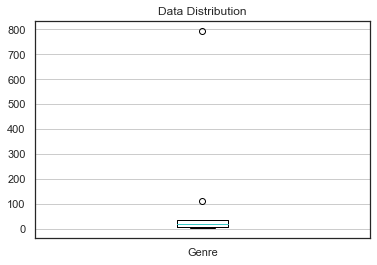

In [73]:
data = list([Y_counts])

fig, ax = plt.subplots()

ax.boxplot(data)
ax.set_title('Data Distribution')
xticklabels=['Genre']
ax.set_xticklabels(xticklabels)

ax.yaxis.grid(True)

plt.show()

In [54]:
X = df.book_id.to_numpy()

In [57]:
np.unique(Y).shape

(9,)

In [43]:
new_df = pd.DataFrame(data={'book_id': X, 'genre': Y}, columns=['book_id', 'genre'])

In [44]:
new_df.genre.

,book_id,genre
0,pg10067.epub,6
1,pg1032.epub,5
2,pg10379.epub,5
3,pg10473.epub,8
4,pg10812.epub,5
...,...,...
991,pg766DickensDavidCopfld.epub,5
992,pg786DickensHardTimes.epub,5
993,pg834DoyleMemoirsSherlk.epub,6
994,pg863Agatha1.epub,6


In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
# plt.rc('font', size=16)

# #set style of plots
# sns.set_style('white')

# #define a custom palette
# customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
# sns.set_palette(customPalette)
# sns.palplot(customPalette)

sns.lmplot(data=new_df, x='book_id', hue='genre', 
                   fit_reg=False, legend=True, legend_out=True)

TypeError: lmplot() missing 1 required positional argument: 'y'

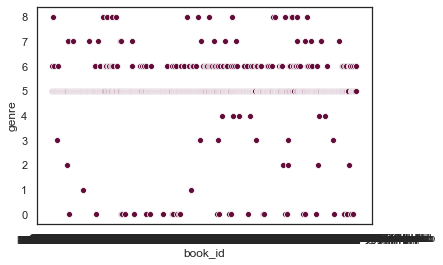

In [53]:
sns.scatterplot(x="book_id", y="genre", 
                     data=new_df)

In [22]:
df.columns

Index(['name', ' hyphens', ' colons', ' semi_colon', ' interjections',
       ' Preposition_or_subordinating_conjunction', ' personal_pronoun',
       ' possessive_pronoun', ' male_oriented', ' female_oriented', ' comma',
       ' period', ' co_conjunction', ' fres', ' ttr', ' genre'],
      dtype='object')

In [42]:
filtered_df = df[['name', 'hyphens', 'colons', 'semi_colon', 'interjections', 'male_oriented', 'female_oriented', 'comma', 'period', 'fres']]
filtered_df = filtered_df.rename(columns={"name": "book_id"})
filtered_df

,book_id,hyphens,colons,semi_colon,interjections,male_oriented,female_oriented,comma,period,fres
0,pg10473.epub,0.010398,0.000145,0.000060,0.004892,0.296328,0.063463,0.049497,0.062430,101.636980
1,pg10943.epub,0.014308,0.001114,0.004554,0.002912,0.283496,0.119311,0.060399,0.048065,91.222417
2,pg1155Agatha2.epub,0.011290,0.001567,0.000297,0.004846,0.211219,0.136949,0.045415,0.065075,97.753041
3,pg11655.epub,0.021617,0.001390,0.004903,0.001793,0.319929,0.219063,0.053963,0.047340,93.220457
4,pg1190.epub,0.017723,0.001564,0.008861,0.002027,0.499743,0.088523,0.072976,0.025542,81.578228
...,...,...,...,...,...,...,...,...,...,...
134,pg8899.epub,0.020146,0.000760,0.001837,0.003247,0.377150,0.213016,0.056717,0.041037,97.375725
135,pg9746.epub,0.007626,0.000000,0.014299,0.003813,0.549020,0.000000,0.066730,0.040038,82.389889
136,pg9807.epub,0.023184,0.000329,0.001580,0.003107,0.316320,0.056638,0.056252,0.041966,92.687289
137,pg9849.epub,0.005712,0.000096,0.004041,0.001951,0.271107,0.180469,0.058919,0.047511,95.466662


In [50]:
address = "E:\\DKE related\\Studies\\Second Semester\\ATiML\\Codes\\Semester Project\\feature_vector.csv"

df = pd.read_csv(address)
df.drop(['avg_punctuation_per_sentence'], axis=1, inplace=True)
df

,book_id,avg_sentence_length,avg_char_per_word,avg_punctuation_per_sentence,long_word_ratio,noun_ratio,verb_ratio,adverb_ratio,preposition_ratio,adjective_ratio,article_ratio,gerund_infinitive_ratio,downtoner_ratio,amplifier_ratio,demonstrative_ratio,type_token_ratio,genre
0,pg44018.epub,0.0436,4.3955,5.4425,0.1811,0.2354,0.1877,0.0591,0.1322,0.0746,0.0792,0.0243,0.0022,0.0031,0.0154,0.0082,Literary
1,pg35509.epub,0.0621,4.3673,3.5867,0.1794,0.2425,0.1732,0.0597,0.1339,0.0805,0.0869,0.0232,0.0022,0.0038,0.0124,0.0147,Literary
2,pg41564.epub,0.0437,4.2362,5.1578,0.1600,0.1981,0.2051,0.0792,0.1114,0.0717,0.0576,0.0208,0.0043,0.0045,0.0148,0.0058,Literary
3,pg30075.epub,0.0796,4.2663,3.1444,0.1719,0.2304,0.2084,0.0589,0.1071,0.0564,0.0690,0.0182,0.0017,0.0016,0.0133,0.0147,Literary
4,pg30436.epub,0.0684,4.3043,3.0671,0.1614,0.2400,0.1855,0.0619,0.1116,0.0810,0.0682,0.0154,0.0026,0.0024,0.0150,0.0028,Literary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,pg15895.epub,0.0601,4.1501,3.2832,0.1323,0.2209,0.1893,0.0553,0.1191,0.0694,0.0808,0.0163,0.0025,0.0014,0.0123,0.0155,Allegories
135,pg1392.epub,0.0488,4.3154,4.1077,0.1814,0.2412,0.1759,0.0554,0.1294,0.0681,0.0878,0.0191,0.0016,0.0044,0.0179,0.0652,Christmas
136,pg43190.epub,0.0641,4.1603,3.9959,0.1451,0.2326,0.1909,0.0500,0.1227,0.0637,0.0679,0.0149,0.0023,0.0020,0.0175,0.0017,Christmas
137,pg587.epub,0.0646,3.8899,3.1216,0.0985,0.2135,0.2097,0.0508,0.1032,0.0581,0.0597,0.0223,0.0013,0.0008,0.0172,0.0038,Humorous


In [44]:
df.merge(filtered_df, on='book_id')

,book_id,avg_sentence_length,avg_char_per_word,avg_punctuation_per_sentence,long_word_ratio,noun_ratio,verb_ratio,adverb_ratio,preposition_ratio,adjective_ratio,...,genre,hyphens,colons,semi_colon,interjections,male_oriented,female_oriented,comma,period,fres
0,pg44018.epub,0.0436,4.3955,5.4425,0.1811,0.2354,0.1877,0.0591,0.1322,0.0746,...,Literary,0.007732,0.002541,0.010647,0.002136,0.377383,0.171201,0.102709,0.022088,78.201643
1,pg35509.epub,0.0621,4.3673,3.5867,0.1794,0.2425,0.1732,0.0597,0.1339,0.0805,...,Literary,0.010637,0.001506,0.003221,0.002225,0.304162,0.157432,0.070962,0.041321,89.787437
2,pg41564.epub,0.0437,4.2362,5.1578,0.1600,0.1981,0.2051,0.0792,0.1114,0.0717,...,Literary,0.008501,0.000158,0.007467,0.003805,0.152394,0.248537,0.090008,0.028045,79.812453
3,pg30075.epub,0.0796,4.2663,3.1444,0.1719,0.2304,0.2084,0.0589,0.1071,0.0564,...,Literary,0.003552,0.000669,0.000600,0.003482,0.162269,0.127951,0.055051,0.049746,93.230489
4,pg30436.epub,0.0684,4.3043,3.0671,0.1614,0.2400,0.1855,0.0619,0.1116,0.0810,...,Literary,0.011565,0.002002,0.006475,0.001434,0.267147,0.182013,0.064562,0.043974,89.614016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,pg15895.epub,0.0601,4.1501,3.2832,0.1323,0.2209,0.1893,0.0553,0.1191,0.0694,...,Allegories,0.005234,0.001863,0.007129,0.002280,0.206852,0.198042,0.065958,0.037089,94.150012
135,pg1392.epub,0.0488,4.3154,4.1077,0.1814,0.2412,0.1759,0.0554,0.1294,0.0681,...,Christmas,0.011659,0.000496,0.008930,0.001240,0.321330,0.066482,0.080205,0.030346,83.475617
136,pg43190.epub,0.0641,4.1603,3.9959,0.1451,0.2326,0.1909,0.0500,0.1227,0.0637,...,Christmas,0.008864,0.000752,0.008586,0.003543,0.210297,0.163412,0.064827,0.038061,95.011601
137,pg587.epub,0.0646,3.8899,3.1216,0.0985,0.2135,0.2097,0.0508,0.1032,0.0581,...,Humorous,0.007602,0.001968,0.000725,0.003104,0.246856,0.098621,0.053216,0.045160,100.073559


In [ ]:
def convert_data(a, b):
    
    row_list =[]     

    for index, rows in a.iterrows(): 
        
        my_list = [rows[i] for i in a.columns]     
        row_list.append(my_list) 
    
    target = [rows for _, rows in b.items()]
        
    return row_list, target

In [2]:
address = "E:\\DKE related\\Studies\\Second Semester\\ATiML\\Codes\\Semester Project\\feature_vector.csv"

df = pd.read_csv(address)

# df['genre'] = df['genre'].astype('category')
# df['genre'] = df['genre'].cat.codes

# X_train,X_test,y_train,y_test = train_test_split(df.iloc[:, 1:-1].to_numpy(), df.iloc[:, -1].to_numpy(),random_state=0)

df[df['genre']=='Allegories']
df.drop([90, 93], inplace=True)

In [ ]:
X_train

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.shuffle(buffer_size=500).batch(50).repeat(200)

test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data = test_data.batch(64)

# for item in train_data:
#     print(item)

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

model.fit(train_data, epochs=3)

result = model.evaluate(test_data)
print(model.metrics_names, result)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20)
# mse_test = model.evaluate(X_test, y_test)
# X_new = X_test[:3]
# y_pred = model.predict(X_new)


plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

y_pred

In [ ]:
df

In [ ]:
address = "E:\\DKE related\\Studies\\Second Semester\\ATiML\\Codes\\Semester Project\\feature_vector.csv"

df = pd.read_csv(address)
df['genre'] = df['genre'].astype('category')
df['genre'] = df['genre'].cat.codes

df

In [ ]:
X = df.iloc[:, 1:-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X.astype(np.float64))



In [ ]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(df.iloc[:, 1:-1], df.iloc[:, -1], test_size=0.20, random_state = 0, shuffle=True, stratify = df.iloc[:, -1])

skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, val_index in skf.split(X_train_val, Y_train_val):
    
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

    nb = MultinomialNB()

    %time nb.fit(X_train, Y_train)

    y_pred_nb = nb.predict(X_val)
    acc_nb = metrics.accuracy_score(y_val, y_pred_nb)
    print(acc_nb)
    


In [ ]:
X = df.iloc[:, 1:-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0, shuffle=True, stratify = Y)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


In [ ]:
nb = MultinomialNB()

%time nb.fit(X_train, Y_train)

Y_pred_nb = nb.predict(X_test)

acc_nb = metrics.accuracy_score(Y_test, Y_pred_nb)
print(acc_nb)

In [ ]:
X

In [125]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

val_acc_svm = 0
val_acc_logistic = 0
val_acc_nb = 0
val_acc_rf = 0

X = df.iloc[:, 1:-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 0, shuffle=True, stratify = Y)

skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, val_index in skf.split(X_train_val, Y_train_val):
    
    X_train, X_val = X_train_val[train_index], X_train_val[val_index]
    Y_train, Y_val = Y_train_val[train_index], Y_train_val[val_index]
    
    X_train, Y_train = tackle_data_imbalance(X_train, Y_train) 

    val_acc_svm += perform_SVM(X_train, Y_train, X_val, Y_val)
    val_acc_logistic += perform_Logistic(X_train, Y_train, X_val, Y_val)
    val_acc_nb += perform_NB(X_train, Y_train, X_val, Y_val)
    val_acc_rf += perform_random_forrest(X_train, Y_train, X_val, Y_val)

    # print("SVM: {}; Logistic: {}; NB: {}; RB: {}".format(round(acc_svm, 4), round(acc_logistic, 4), round(acc_nb, 4), round()))

val_acc_svm = float(val_acc_svm/5)
val_acc_logistic = float(val_acc_logistic/5)
val_acc_nb = float(val_acc_nb/5) 
val_acc_rf = float(val_acc_rf/5) 

print("Average Validation Accuracy")
print("SVM: {}; Logistic: {}; NB: {}; RB: {}".format(round(val_acc_svm, 4), round(val_acc_logistic, 4), round(val_acc_nb, 4), round(val_acc_rf, 4)))

# test accuracy 


--------------------------------
(170, 15) (170,) Counter({'Adventure': 25, 'Mystery': 24, 'Literary': 21, 'Humorous': 21, 'Christmas': 21, 'Western': 20, 'Horror': 20, 'Romance': 18})
(144, 15) (144,) Counter({'Adventure': 18, 'Christmas': 18, 'Horror': 18, 'Humorous': 18, 'Literary': 18, 'Mystery': 18, 'Romance': 18, 'Western': 18})
--------------------------------
fitting data to SVM
Wall time: 5.25 ms
fitting data to Logistic
Wall time: 29.4 ms
fitting data to Naive Bayes
Wall time: 954 µs
--------------------------------
(164, 15) (164,) Counter({'Western': 24, 'Literary': 23, 'Christmas': 21, 'Humorous': 21, 'Horror': 20, 'Mystery': 19, 'Romance': 18, 'Adventure': 18})
(144, 15) (144,) Counter({'Adventure': 18, 'Christmas': 18, 'Horror': 18, 'Humorous': 18, 'Literary': 18, 'Mystery': 18, 'Romance': 18, 'Western': 18})
--------------------------------
fitting data to SVM
Wall time: 2.03 ms
fitting data to Logistic
Wall time: 37 ms
fitting data to Naive Bayes
Wall time: 2.24 ms
---

In [124]:
from collections import Counter
import operator

def tackle_data_imbalance(X, Y):
    
    counter = Counter(Y)
        
    total_classes = len(counter)
    total_data_points = sum(counter.values())
    expected_points = total_data_points*3
    avg_points_per_class = int(expected_points/total_classes)
    
    # generating highest amount of data for each class 
    # higest_key, highest_val = max(counter.items(), key=operator.itemgetter(1))
    # famous_dict = dict((key, highest_val) for key in counter) 
    
    famous_dict = dict((key, avg_points_per_class) for key in counter) # generating double of previous for each class
    
    over = ADASYN(n_neighbors=1, sampling_strategy=famous_dict)    
    under = RandomUnderSampler(sampling_strategy="auto")
    
    print("--------------------------------")

    X, Y = over.fit_resample(X, Y)
    print(X.shape, Y.shape, Counter(Y))
    X, Y = under.fit_resample(X, Y)    
    print(X.shape, Y.shape, Counter(Y))
    print("--------------------------------")
    return X, Y

In [ ]:
import operator


famous_dict = {
        7: 10, 
        6: 10, 
        5: 9, 
        0: 9, 
        8: 9, 
        2: 4, 
        3: 4, 
        4: 4, 
        1: 1
    }

counter = Counter(famous_dict)

new_dict = {}
higest_key, highest_val = max(famous_dict.items(), key=operator.itemgetter(1))

new_dict = dict((key, counter.get(key)*2) for key in counter)

print(new_dict)

In [115]:
from sklearn.svm import SVC

def perform_SVM(X_train, Y_train, X_val, Y_val):
    # SVM 
    
    svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=50, C=500))
    ])


    # ("svm_clf", SVC(kernel="rbf", gamma=0.0001, C=0.1)) -> 28 
    # ("svm_clf", SVC(kernel="poly", degree=10, coef0=50, C=500)) -> 30
    
    print("fitting data to SVM")
    # svm_clf = SVC(gamma='auto')
    %time svm_clf.fit(X_train, Y_train)
    Y_pred_svm = svm_clf.predict(X_val)
    
    return metrics.accuracy_score(Y_val, Y_pred_svm)

def perform_Logistic(X_train, Y_train, X_val, Y_val):
    

    clf = Pipeline([
            ("scaler", StandardScaler()),
            ("lr", LogisticRegression(multi_class="multinomial", solver="lbfgs", C=50, n_jobs=-1, class_weight='balanced'))
        ])        
    
    print("fitting data to Logistic")
    %time clf.fit(X_train, Y_train)
    Y_pred_logistic = clf.predict(X_val)
    return metrics.accuracy_score(Y_val, Y_pred_logistic)

    # Multinomial Naive Bayes

def perform_NB(X_train, Y_train, X_val, Y_val):
    
    nb = MultinomialNB(alpha=0.001)
    print("fitting data to Naive Bayes")
    %time nb.fit(X_train, Y_train)
    Y_pred_nb = nb.predict(X_val)
    return metrics.accuracy_score(Y_val, Y_pred_nb)

def perform_random_forrest(X_train, Y_train, X_val, Y_val):

    clf = Pipeline([
            ("scaler", StandardScaler()),
            ("rf", RandomForestClassifier(max_depth=100))
        ])
            
    clf.fit(X_train, Y_train)

    Y_pred = clf.predict(X_val)
    return metrics.accuracy_score(Y_val, Y_pred)

In [ ]:
def select_k_features(k, X_train, X_test, Y_train):
    ch2 = feature_selection.SelectKBest(feature_selection.chi2, k=k)
    X_train = ch2.fit_transform(X_train, Y_train)
    X_test = ch2.transform(X_test)
    return X_train, X_test

In [ ]:
X = df.iloc[:, 1:-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, stratify = Y)

In [ ]:
X_train_val, X_test = select_k_features(10, X_train_val, X_test, Y_train_val)
perform_random_forrest(X_train_val, Y_train_val, X_test, Y_test)


In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB


def do_ensemble_and_learn(X_train, Y_train, X_test, Y_test): 

    clf1 = ("svm_clf", SVC(kernel="poly", degree=10, coef0=50, C=500))
    clf2 = ("lr", LogisticRegression(multi_class="multinomial", solver="lbfgs", C=50, n_jobs=-1, class_weight='balanced'))
    clf3 = ("rf", RandomForestClassifier())
    
    ensemble_clf = VotingClassifier(
                estimators=[
                    clf1, 
                    clf2,
                    clf3
                ], 
                voting='hard'
            )

    eclf = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", ensemble_clf)
    ])

    eclf = eclf.fit(X_train, Y_train)
    Y_preds = eclf.predict(X_test)
    return metrics.accuracy_score(Y_test, Y_preds)



In [18]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

X = df.iloc[:, 1:-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, stratify = Y)

do_ensemble_and_learn(X_train, Y_train, X_test, Y_test)

0.5